# RandomForestRegressor

In this section, the cleaned dataset will be load and model. The cleaned dataset load is the cleaned.csv.

## Import libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
# Cleaned data
data = pd.read_csv("../dataset/df_day_data.csv")

# With outliers
X_train = pd.read_csv("../dataset/with_outliers/X_train.csv")
X_test = pd.read_csv("../dataset/with_outliers/X_test.csv")
Y_train = pd.read_csv("../dataset/with_outliers/y_train.csv")
Y_test = pd.read_csv("../dataset/with_outliers/y_test.csv")

# Without outliers
no_X_train = pd.read_csv("../dataset/no_outliers/X_train.csv")
no_X_test = pd.read_csv("../dataset/no_outliers/X_test.csv")
no_Y_train = pd.read_csv("../dataset/no_outliers/y_train.csv")
no_Y_test = pd.read_csv("../dataset/no_outliers/y_test.csv")

### Random Forest Regression Model

#### Why Forest Regression Model:

The basic idea behind this model is a collection of multiple random decision trees and it's much less sensitive to the training data. In short, this model randomly perform row sampling and feature sampling from the dataset forming sample datasets by a progress called Bootstrap. The sample flow of this model is listed below:

#### Hypothesis:

RandomForestRegressor Model score better accuracy when fed with datasets without outliers.

#### Initialization:

In [3]:
# Reusable functions and objects
regressor = RandomForestRegressor(random_state=42)

# Function to make predictions
def prediction(x_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(x_test)    
    print("Predicted values:")
    print(y_pred)
    print("")
    return y_pred
      
# Function to calculate accuracy for continuos values.
def cal_regressor_accuracy(y_test, y_pred):
    
    r2 = metrics.r2_score(y_test, y_pred)
    print ("R^2      : ",r2)
    print ("Accuracy : ",np.round(r2*100), " %")
    print("")
    
def display_result(x_train, x_test, y_train, y_test):
    
    # Dataset Information
    print ("=====================")
    print (" Dataset Information ")
    print ("=====================")
    print ("Dataset Used   : day.csv => X_train, X_test, Y_train, Y_test")
    print ("Dataset Length :", len(data))
    print ("Dataset Shape  :", data.shape)
    s = ""
    for col in data.columns[:].values:
        s = col + " " + s
    print ("Dataset Column :", s)
    print ("")

    # Prediction Using Regressor
    print ("=====================")
    print ("  Regressor & Train  ")
    print ("=====================")
    regressor_data = regressor.fit(x_train, y_train)
    y_prediction = prediction(x_test, regressor_data)
    cal_regressor_accuracy(y_test, y_prediction)

#### With_outliers : X_train, Y_train, X_test, Y_test

In [4]:
# Initialising Phase
x_train, x_test, y_train, y_test = X_train, X_test, Y_train, Y_test

# Building Phase
display_result(x_train, x_test, y_train, y_test)

 Dataset Information 
Dataset Used   : day.csv => X_train, X_test, Y_train, Y_test
Dataset Length : 718
Dataset Shape  : (718, 12)
Dataset Column : count registereduser casualuser windspeed humidity temperature weather weekday holiday month year season 

  Regressor & Train  
Predicted values:
[5030.77 4559.87 1557.64 1103.07 3361.81 2639.41 4025.53 6044.03 6313.53
  779.32 1478.78 1823.41 1880.73 4941.37 4624.63 4501.02 7422.28 6056.79
 3152.35 2286.5  7516.59 2338.2  5064.15 4651.79 1743.96 6861.68 3772.13
 5110.79 7233.52 7469.74 1204.35 4758.34 5546.16 5182.76 2304.41 3944.48
 6399.6  6001.18 2314.73 3415.95 6675.31 1609.45 4637.73 3941.49 7303.16
 7077.5  2993.18 4210.82 2107.65 1938.31 6546.63 6769.13 5358.   6896.18
 4186.52 3848.02 3509.71 6814.82 6708.65 2919.48 6834.77 4083.68 4445.58
 8057.05 7155.83 2982.64 4565.4  6083.27 6574.54 4906.77 6255.96 7236.42
 3211.5  6778.63 3911.6  6591.9  6012.95 6884.22 3041.92 2390.38 4346.46
 5025.9  5109.92 1791.72 4290.83 7309.8  5170.05

#### No_outliers : no_X_train, no_Y_train, no_X_test, no_Y_test

In [5]:
# Initialising Phase
x_train, x_test, y_train, y_test = no_X_train, no_X_test, no_Y_train, no_Y_test

# Building Phase
display_result(x_train, x_test, y_train, y_test)

 Dataset Information 
Dataset Used   : day.csv => X_train, X_test, Y_train, Y_test
Dataset Length : 718
Dataset Shape  : (718, 12)
Dataset Column : count registereduser casualuser windspeed humidity temperature weather weekday holiday month year season 

  Regressor & Train  
Predicted values:
[6726.88 7258.69 6723.51 5562.16 5046.33 5671.96 3418.9  1462.64 1064.68
 1380.87 5664.53 5725.77 2170.15 3583.21 3477.67 2251.43 4012.28 5136.08
 3607.5  6716.6  3480.92 2672.98 4774.38 6733.98 4923.36 6093.14 4401.86
 7473.48 1188.68 2301.63 4071.11 5187.29 6465.76 5138.6  6882.1  6048.38
 7023.28 3662.68 3351.3  1637.19 1792.7  3758.53 2186.14 7100.83 4423.31
 4917.52 3822.31 3523.54 3383.45 7984.18 3654.65 7414.73 5853.63 7545.52
 5127.89 6011.01 2609.68 2829.94 7555.3  7343.16 4816.4  6652.07 6555.78
  898.69 4830.88 4673.62 2705.45 2759.82 5234.29 5949.12 5250.87 6828.16
 3356.97 3074.43 2233.93 4287.44 1945.26 5905.97 2200.17 4714.55 4896.5
 1577.91 4055.66 7144.88 6529.9  6681.5  7048.74 

#### Observation : RandomForestRegressor Model Accuracy

RandomForestRegressor Model score 89-90% accuracy with the day.csv datasets where it hit better accuracy when fed with datasets without outliers(90%) while scoring lower(89%) when fed with datasets with outliers .

#### For Visualising Result:

 Dataset Information 
Dataset Used   : day.csv
Dataset Length : 718
Dataset Shape  : (718, 12)
Dataset Column : season month holiday weekday weather windspeed humidity temperature 

Enter the data column act as the x_axis for prediction: month


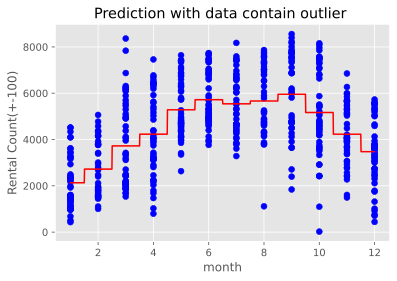

This red line was the line of prediction.
---------------------
 Prediction for 2023
---------------------
Jan:  2131.0
Feb:  2722.0
Mar:  3723.0
Apr:  4231.0
May:  5283.0
Jun:  5719.0
Jul:  5541.0
Aug:  5663.0
Sep:  5954.0
Oct:  5166.0
Nov:  4229.0
Dec:  3475.0


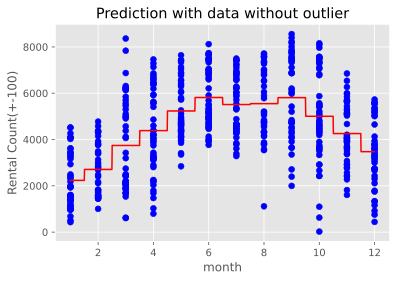

This red line was the line of prediction.
---------------------
 Prediction for 2023
---------------------
Jan:  2234.0
Feb:  2707.0
Mar:  3743.0
Apr:  4385.0
May:  5232.0
Jun:  5815.0
Jul:  5511.0
Aug:  5549.0
Sep:  5809.0
Oct:  5003.0
Nov:  4257.0
Dec:  3474.0


In [6]:
cols_K = ["temperature","humidity","windspeed","weather","weekday","holiday","month","season"]
K_ref = ["season","month","holiday","weekday","weather","windspeed","humidity","temperature"]
K_f = [0,2,3,4,5,6,7,8]
K_b = [1,3,4,5,6,7,8,9]

def intro():
    print ("=====================")
    print (" Dataset Information ")
    print ("=====================")
    print ("Dataset Used   : day.csv")
    print ("Dataset Length :", len(data))
    print ("Dataset Shape  :", data.shape)
    c = ""
    for col in cols_K:
        c = col + " " + c
    print ("Dataset Column :", c)
    print ("")
    key = input("Enter the data column act as the x_axis for prediction: ")
    return key

def visualise_prediction(x,y,title,x_axis,y_axis,text):
    # Create regressor object
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

    # Fit the regressor with x and y data
    regressor.fit(x, y)  

    Y_pred = regressor.predict(np.array([8.5]).reshape(1, 1))  # test the output by changing values

    # Visualising the Random Forest Regression results
    # Arange values from min value of x to max value of x with a difference of 0.01 between two consecutive values
    X_grid = np.arange(min(x), max(x), 0.01) 

    # Reshape for reshaping the data into a len(X_grid)*1 array            
    X_grid = X_grid.reshape((len(X_grid), 1))

    # Scatter plot for original data
    plt.scatter(x, y, color = 'blue')  

    # Plot predicted data
    plt.plot(X_grid, regressor.predict(X_grid), color = 'red') 
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()
    print(text)
    if x_axis == "month":
        print("---------------------")
        print(" Prediction for 2023")
        print("---------------------")
        mnth = ["Jan: ", "Feb: ", "Mar: ", "Apr: ", "May: ", "Jun: ", "Jul: ", "Aug: ", "Sep: ", "Oct: ", "Nov: ", "Dec: "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100 or cnt == 200 or cnt == 300 or cnt == 400 or cnt == 500 or cnt == 600 or cnt == 700 or cnt == 800 or cnt == 900 or cnt == 1000 or cnt == 1100 or cnt == 1200):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "season":
        print("---------------------")
        print(" Prediction for 2023")
        print("---------------------")
        mnth = ["Winter(1): ", 
                "Spring(2): ", 
                "Summer(3): ", 
                "Fall  (4): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100 or cnt == 200 or cnt == 300 or cnt == 400 or cnt == 500 or cnt == 600 or cnt == 700 or cnt == 800 or cnt == 900 or cnt == 1000 or cnt == 1100 or cnt == 1200):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "holiday":
        print("---------------------")
        print(" Prediction for 2023")
        print("---------------------")
        mnth = ["Holiday(1): ", 
                "Workday(0): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100 or cnt == 200 or cnt == 300 or cnt == 400 or cnt == 500 or cnt == 600 or cnt == 700 or cnt == 800 or cnt == 900 or cnt == 1000 or cnt == 1100 or cnt == 1200):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "weekday":
        print("---------------------")
        print(" Prediction for 2023")
        print("---------------------")
        mnth = ["Sunday    (0): ",
                "Monday    (1): ",
                "Tuesday   (2): ",
                "Wednesday (3): ",
                "Thursday  (4): ",
                "Friday    (5): ",
                "saturday  (6): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100 or cnt == 200 or cnt == 300 or cnt == 400 or cnt == 500 or cnt == 600 or cnt == 700 or cnt == 800 or cnt == 900 or cnt == 1000 or cnt == 1100 or cnt == 1200):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "weather":
        print("---------------------")
        print(" Prediction for 2023")
        print("---------------------")
        mnth = ["Clear, Few clouds, Partly cloudy, Partly cloudy(1): ", 
                "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist(2): ", 
                "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds(3): ", 
                "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  (4): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100 or cnt == 200 or cnt == 300 or cnt == 400 or cnt == 500 or cnt == 600 or cnt == 700 or cnt == 800 or cnt == 900 or cnt == 1000 or cnt == 1100 or cnt == 1200):
                print(mnth[c], n)
                c += 1
            cnt += 1

def personalised_prediction(key):
    title_with_outliers  = "Prediction with data contain outlier "
    title_no_outliers  = "Prediction with data without outlier"
    x_axis = key
    y_axis = "Rental Count(+-100)"
    text = "This red line was the line of prediction."
        
    if key in cols_K:
        i = K_ref.index(key)
        x_f = K_f[i]
        x_b = K_b[i]
            
        # For test data with outliers
        x = X_train.iloc[:, x_f:x_b].values 
        y = Y_train.iloc[:,:1].values 
        visualise_prediction(x,y,title_with_outliers,x_axis,y_axis,text)

        # For test data without outliers
        x_no = no_X_train.iloc[:, x_f:x_b].values
        y_no = no_Y_train.iloc[:,:1].values 
        visualise_prediction(x_no,y_no,title_no_outliers,x_axis,y_axis,text)
    else:
        print("Invalid Column Name")
    
personalised_prediction(intro())   

## Try ...

### Weather Forecast

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [15]:
m = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Slope")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")

# An HBox lays out its children horizontally
ui = widgets.HBox([m, c])

def plot(m, c):
    x = np.random.rand(10)
    y = m *x + c
    plt.plot(x,y)
    plt.show()

out = widgets.interactive_output(plot, {'m': m, 'c': c})

display(out, ui)

NameError: name 'x_f' is not defined

In [14]:
m = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Slope")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")

# An HBox lays out its children horizontally
ui = widgets.HBox([m, c])

def plot(m, c):
    x = np.random.rand(10)
    y = m *x + c
    plt.plot(x,y)
    plt.show()

out = widgets.interactive_output(plot, {'m': m, 'c': c})

display(out, ui)

Output()

In [ ]:

# # ------- for classification usage -------------
    
# # Function to perform training with gini for discrete values.
# def train_using_gini(x_train, y_train):

#     # Creating the classifier object
#     clf_gini = RandomForestClassifier(criterion = "gini", random_state=42)
  
#     # Performing training
#     clf_gini.fit(x_train, y_train)
#     return clf_gini
      
# # Function to perform training with entropy for discrete values.
# def tarin_using_entropy(x_train, y_train):
  
#     # Decision tree with entropy
#     clf_entropy = RandomForestClassifier(criterion = "entropy", random_state = 42)
  
#     # Performing training
#     clf_entropy.fit(x_train, y_train)
#     return clf_entropy

# # Function to calculate accuracy for discrete values.
# def cal_accuracy(y_test, y_pred):
        
#     print("Confusion Matrix: ")
#     print(confusion_matrix(y_test, y_pred))
#     print("")
      
#     print ("Accuracy : ",np.round(accuracy_score(y_test,y_pred)*100), " %")
#     print("")
      
#     print("Report : ")
#     print(classification_report(y_test, y_pred))
#     print("")
    